In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import subprocess
import seaborn as sns
from datetime import datetime, timedelta
from pandas.plotting import table
from PIL import Image
# from adjustText import adjust_text
# pd.options.mode.chained_assignment = None
calculate_date = '2024-11-14'
current_dir = os.getcwd()
path1_csv = f'{current_dir}/out_folder_july/{calculate_date}/purchase-combined_{calculate_date}.csv'

path1_excel = f'{current_dir}/out_folder_july/{calculate_date}/purchase-combined_{calculate_date}.xlsx'
path2 = f'{current_dir}/out_folder_july/{calculate_date}/daily-formetted_{calculate_date}.csv'
path3_csv = f'{current_dir}/out_folder_july/{calculate_date}/creditcard_{calculate_date}.csv'
path3_excel = f'{current_dir}/out_folder_july/{calculate_date}/creditcard_{calculate_date}.xlsx'
path4 = f'{current_dir}/out_folder_july/{calculate_date}/network_{calculate_date}.csv'
folder = f'{current_dir}/out_folder_july/{calculate_date}/image/'
if not os.path.exists(folder):
    os.makedirs(folder)

In [2]:
if os.path.exists(path1_csv):
    df = pd.read_csv(path1_csv)
if os.path.exists(path1_excel):
    df = pd.read_excel(path1_excel)
# df = pd.read_csv(path1)
# df['DateAndFilename'] = df['DateAndFilename'].apply(lambda x: x[30:40])
df['DateAndFilename'] = df['DateAndFilename'].apply(lambda x: x[0:10])
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'],inplace=True)
pivot_table = df.pivot_table(index='status', aggfunc='size')
filtered_df = df[df['status'] == 'purchaseSuccessful']
pivot_table1 = filtered_df.pivot_table(index='Package', aggfunc='size')
df_pivot = pd.DataFrame(pivot_table1, columns=['Counts'])
df_pivot.reset_index(inplace=True)

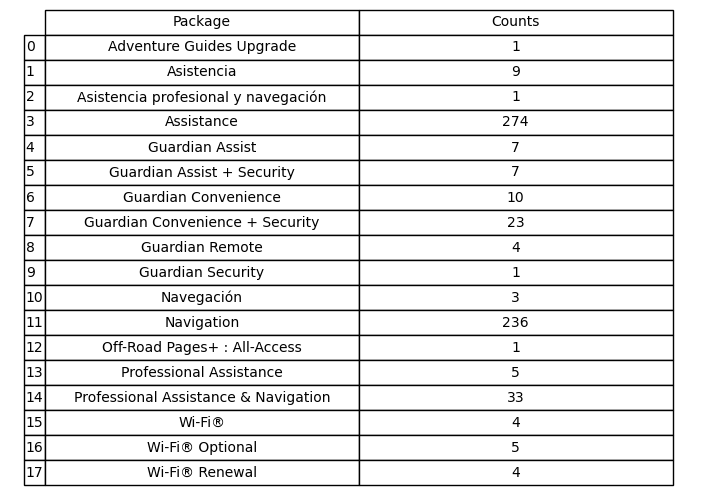

In [3]:
# Create a plot
fig, ax = plt.subplots(figsize=(9, 1))  # Set the figure size as needed
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.yaxis.set_visible(False)  # Hide the y-axis
ax.set_frame_on(False)  # No visible frame

tbl = table(ax, df_pivot, loc='center', cellLoc='center', colWidths=[0.3] * len(df_pivot.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  # Adjust scale as needed
plt.savefig(f'{folder}/package_purchase.png', bbox_inches='tight', pad_inches=0.1)
# import pandas as pd
# from tabulate import tabulate

# # # Assuming df_pivot is your existing DataFrame
# # # Get top 3 and bottom 3
# # top_3 = df_pivot.nlargest(3, 'Counts')
# # bottom_3 = df_pivot.nsmallest(3, 'Counts')
# # result = pd.concat([top_3, bottom_3])

# # # Display the table
# # print("\nTop 3 and Bottom 3 Packages:")
# # print("="*50)
# # print(result.to_string(index=False))

# # Get top 3 and bottom 3
# top_3 = df_pivot.nlargest(3, 'Counts')
# bottom_3 = df_pivot.nsmallest(3, 'Counts')
# result = pd.concat([top_3, bottom_3])

# # Create a styled table
# print("\nTop 3 and Bottom 3 Packages:")
# print(tabulate(result, headers='keys', tablefmt='pretty', showindex=False))


In [4]:
#screenshot 2
total_count = pivot_table1.sum()
df['PDate'] = df['DateAndFilename'].apply(lambda df: df[0:10])
pivot_table2 = df.pivot_table(index='PDate', columns='status', aggfunc='size', fill_value=0)
total_status_counts = pivot_table2.sum(axis=0).to_frame().T
total_status_counts.index = ['Total']

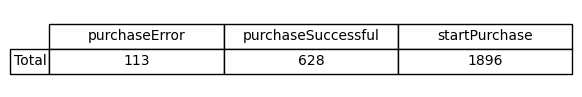

In [5]:
# Create a plot
fig, ax = plt.subplots(figsize=(5, 1))  # Set the figure size as needed
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.yaxis.set_visible(False)  # Hide the y-axis
ax.set_frame_on(False)  # No visible frame

# Create a table
tbl = table(ax, total_status_counts, loc='center', cellLoc='center', colWidths=[0.3] * len(total_status_counts.columns))

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  # Adjust scale as needed
plt.savefig(f'{folder}/purchase_event_count.png', bbox_inches='tight', pad_inches=0.1)

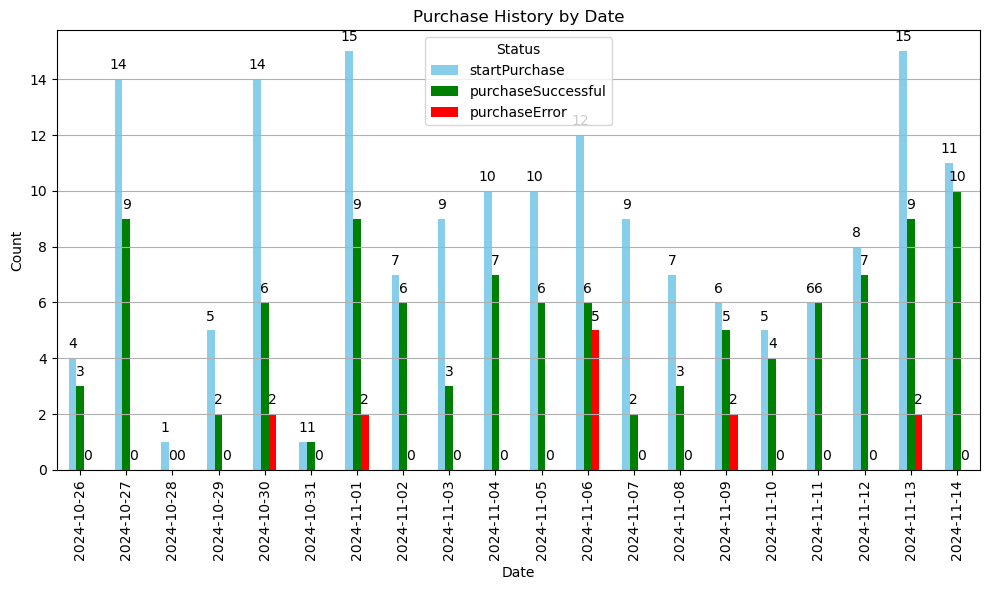

In [6]:
# last20_data = pivot_table2.tail(20)
# ax = last20_data.plot(kind='bar', figsize=(10, 6))
# plt.title('Purchase History by Date')
# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.legend(title='Status')
# plt.grid(axis='y')
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# plt.tight_layout()
# plt.savefig(f'{folder}/purchase_plot.png')
# plt.show()

# colors = {'startPurchase': 'skyblue', 'purchaseSuccessful': 'green','purchaseError': 'red' }
# last20_data = pivot_table2.tail(20)
# ax = last20_data.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in last20_data.columns])
# plt.title('Purchase History by Date')
# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.legend(title='Status',loc='upper left')
# plt.grid(axis='y')
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# plt.tight_layout()
# plt.savefig(f'{folder}/purchase_plot.png')
# plt.show()

colors = {'purchaseError': 'red', 'purchaseSuccessful': 'green', 'startPurchase': 'skyblue'}
last20_data = pivot_table2.tail(20)
last20_data = last20_data[['startPurchase', 'purchaseSuccessful', 'purchaseError']]
ax = last20_data.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in last20_data.columns])
plt.title('Purchase History by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
handles, labels = ax.get_legend_handles_labels()
order = [labels.index('startPurchase'), labels.index('purchaseSuccessful'), labels.index('purchaseError')]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Status')
plt.grid(axis='y')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.savefig(f'{folder}/purchase_plot.png')
plt.show()

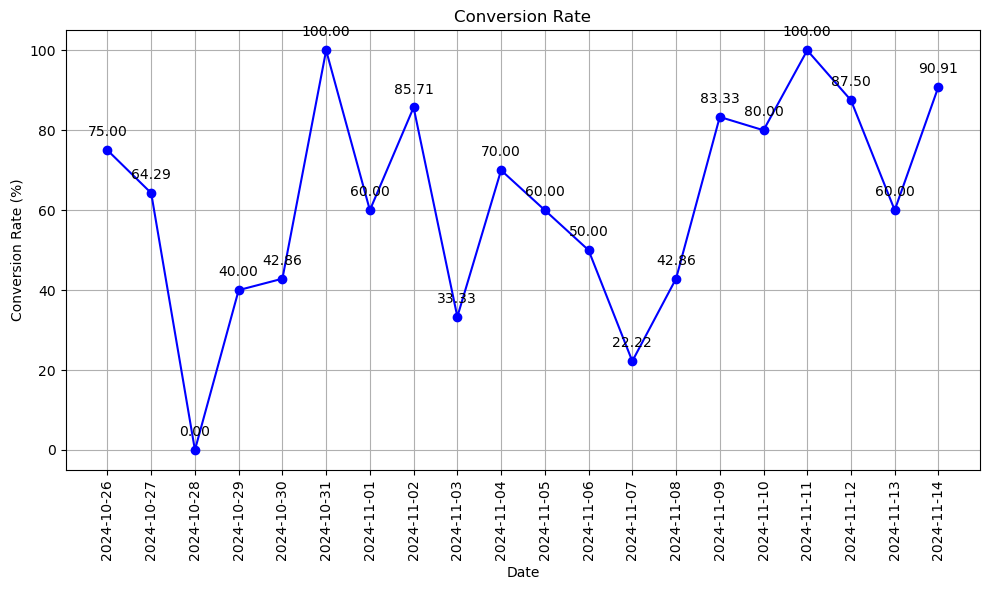

In [7]:
last20_data['conversion_rate'] = (last20_data['purchaseSuccessful'] / last20_data['startPurchase']) * 100
last20_data.reset_index(inplace=True)
x = last20_data['PDate'].values
y = last20_data['conversion_rate'].values
last_date = last20_data.index.max()
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.title(f'Conversion Rate')
plt.grid(True)
plt.xticks(rotation=90)
for i, txt in enumerate(last20_data['conversion_rate']):
    plt.annotate(f'{txt:.2f}', (last20_data.index[i], last20_data['conversion_rate'][i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()
plt.savefig(f'{folder}/purchase_conversion_rate.png')
plt.show()

# plot for daily formated data

In [8]:
df = pd.read_csv(path2)
df['properties.appName'] = df['properties.appName'].str.lower()
pivot_df = df.pivot_table(
    index=['properties.appName'],
    aggfunc={
        'userId': pd.Series.nunique,
        'properties.appName': 'count'
    },
    fill_value=0
).rename(columns={
    'userId': 'userId',
    'properties.appName': 'Event'
}).reset_index()
pivot_df['UserVinInteraction'] = round((pivot_df['Event'] / pivot_df['userId']) * 100,2)

/tmp/ipykernel_9441/555037887.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path2)


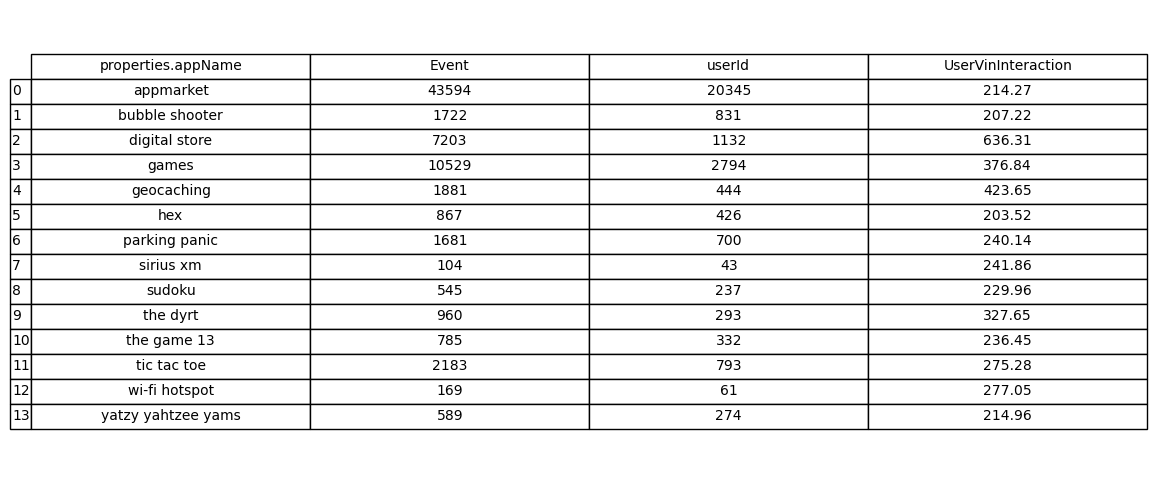

In [9]:
#screen shot 1
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size as needed
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.yaxis.set_visible(False)  # Hide the y-axis
ax.set_frame_on(False)  # No visible frame

# Create a table
tbl = table(ax, pivot_df, loc='center', cellLoc='center', colWidths=[0.3] * len(pivot_df.columns))

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  # Adjust scale as needed

plt.savefig(f'{folder}/daily_appusage.png', bbox_inches='tight', pad_inches=0.1)

In [10]:
# fig, ax = plt.subplots(figsize=(10, 6))

# bar_width = 0.4
# index = range(len(pivot_df))

# # Event bars
# bars1 = ax.bar(index, pivot_df['Event'], bar_width, label='Event', color='b')
# # userId bars
# bars2 = ax.bar([i + bar_width for i in index], pivot_df['userId'], bar_width, label='userId', color='g')

# # Adding labels for Event bars
# for bar in bars1:
#     height = bar.get_height()
#     ax.annotate('{}'.format(height),
#                 xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),  # 3 points vertical offset
#                 textcoords="offset points",
#                 ha='center', va='bottom')

# # Adding labels for userId bars
# for bar in bars2:
#     height = bar.get_height()
#     ax.annotate('{}'.format(height),
#                 xy=(bar.get_x() + bar.get_width() / 2, height),
#                 xytext=(0, 3),  # 3 points vertical offset
#                 textcoords="offset points",
#                 ha='center', va='bottom')

# # Set labels and title
# ax.set_xlabel('Properties App Name')
# ax.set_ylabel('Counts')
# ax.set_title('Event and userId Counts for Properties App Name')
# ax.set_xticks([i + bar_width / 2 for i in index])
# ax.set_xticklabels(pivot_df['properties.appName'], rotation=90, ha='right')
# ax.legend()
# plt.tight_layout()
# plt.savefig(f'{folder}/daily_appusage_plot.png')
# plt.show()


# Plot for credit card

In [11]:
if os.path.exists(path3_csv):
    df = pd.read_csv(path3_csv)
if os.path.exists(path3_excel):
    df = pd.read_excel(path3_excel)
# df = pd.read_csv(path3,header=0)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'],inplace=True)
df['meta'] = df['meta'].apply(lambda df: df[0:10])
df2 = df.groupby(['meta','event'])['event'].count()
df2 = df2.reset_index(name='count')
df2 = df2.sort_values(by=['meta'], ascending=True)
df3= df2.tail(30)

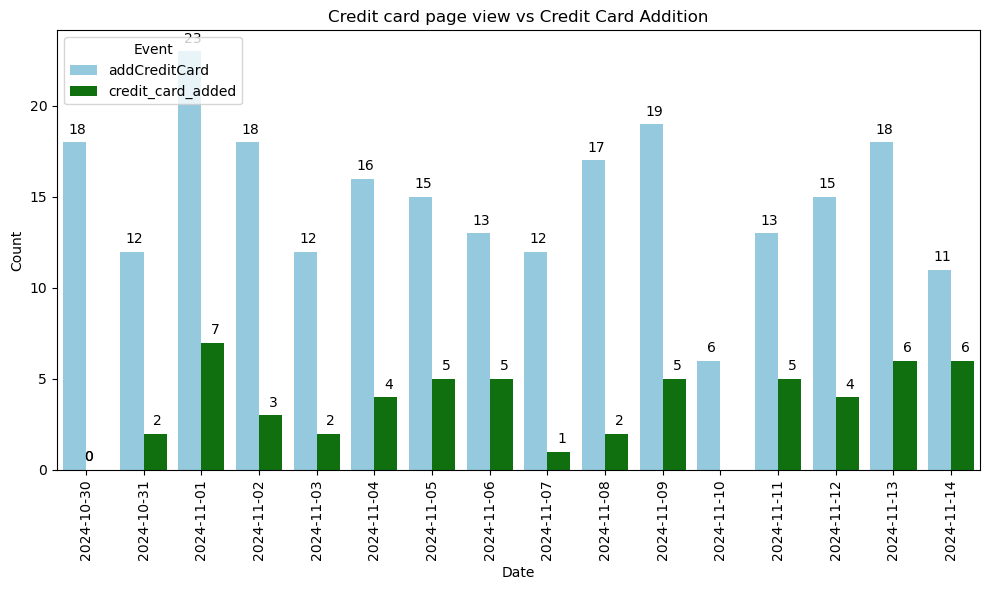

In [12]:
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(data=df3, x='meta', y='count', hue='event')
# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.title('Credit card page view vs Credit Card Addition')

# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha = 'center', va = 'center', 
#                 xytext = (2, 9), 
#                 textcoords = 'offset points')
    
# plt.xticks(rotation=90)
# plt.legend(title='Event')
# plt.tight_layout()
# plt.savefig(f'{folder}/credit_card_plot.png')
# plt.show()
# colors = {'addCreditCard': 'orange', 'credit_card_added': 'green'}
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(data=df3, x='meta', y='count', hue='event', palette=colors)
 
# plt.xlabel('Date')
# plt.ylabel('Count')
# plt.title('Credit card page view vs Credit Card Addition')
 
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'),
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(2, 9),
#                 textcoords='offset points')
 
# plt.xticks(rotation=90)
# plt.legend(title='Event')
# plt.tight_layout()
# plt.savefig(f'{folder}/credit_card_plot.png')
# plt.show()

colors = {'addCreditCard': 'skyblue', 'credit_card_added': 'green'}
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df3, x='meta', y='count', hue='event', hue_order=['addCreditCard','credit_card_added'], palette=colors)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Credit card page view vs Credit Card Addition')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(2, 9),
                textcoords='offset points')
plt.xticks(rotation=90)
plt.legend(title='Event', loc='upper left')
plt.tight_layout()
plt.savefig(f'{folder}/credit_card_plot.png')
plt.show()

In [13]:
df4 = df3.pivot(index=['meta'],columns=['event'],values=['count'])
df4 = df4.reset_index()
df4.columns = ['Date', 'addCreditCard', 'credit_card_added']
df4 = df4.sort_values(by=['Date'])
df4 = df4.fillna(0)
df4['conversion_rate'] = df4['credit_card_added']*100/df4['addCreditCard']

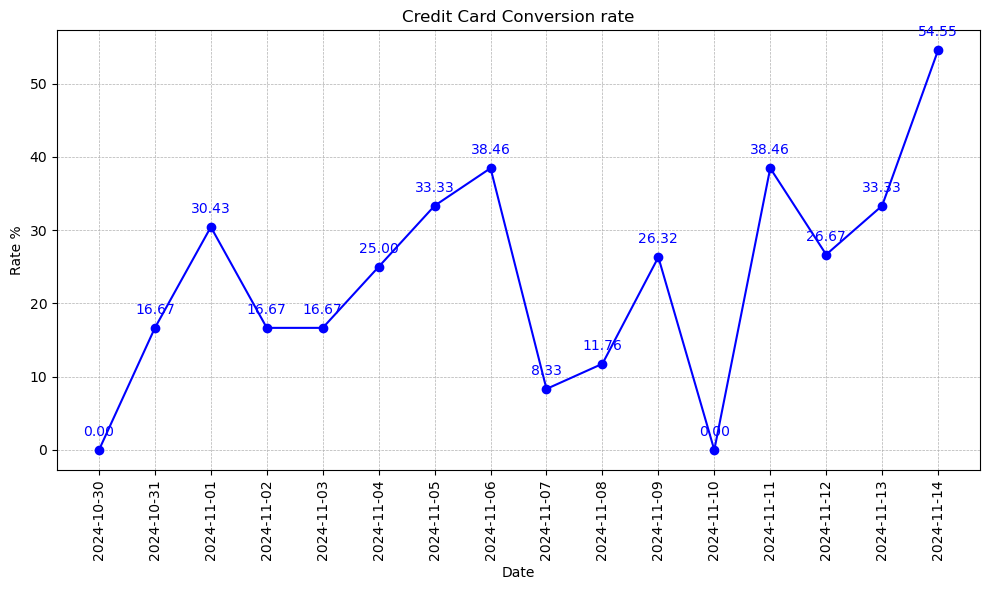

In [14]:
x = df4['Date'].values
y = df4['conversion_rate'].values
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Line')
plt.xlabel('Date')
plt.ylabel('Rate %')
plt.title('Credit Card Conversion rate')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
for i, txt in enumerate(y):
    plt.annotate(f'{txt:.2f}', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center', color='b')
plt.savefig(f'{folder}/credit_card_conversion_rate.png')
plt.show()

# Plot for network

In [15]:
df = pd.read_csv(path4,header=0)
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'],inplace=True)
df['meta'] = df['meta'].apply(lambda df: df[0:10])
l =['Wi-Fi','Sirius','SIRIUS']
pattern = '|'.join(l)
df = df[df['network'].str.contains(pattern, regex=True, case=False)]
df2 = df.groupby(['meta','network'])['network'].count()
df2 = df2.reset_index(name='count')
df2 = df2.sort_values(by=['meta'], ascending=True)
df3= df2.tail(49)

/tmp/ipykernel_9441/2697292347.py:1: DtypeWarning: Columns (8,9,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path4,header=0)


/tmp/ipykernel_9441/3108469099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['meta'] = pd.to_datetime(df3['meta'])
/tmp/ipykernel_9441/3108469099.py:24: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_9441/3108469099.py:25: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from current font.
  plt.savefig(f'{folder}/network_plot.png')
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


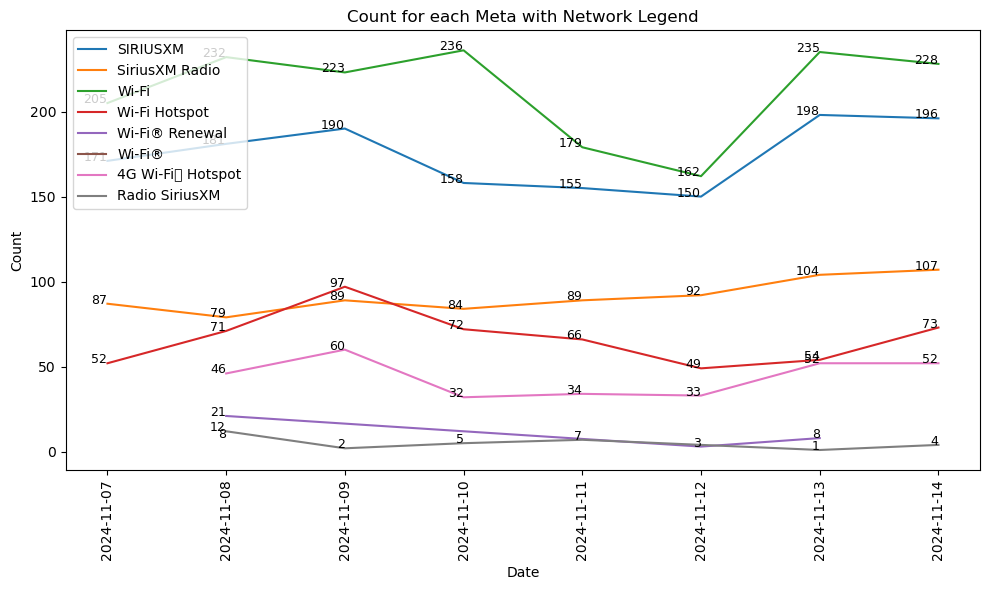

In [16]:
df3['meta'] = pd.to_datetime(df3['meta'])

# Sort the DataFrame by the 'meta' column
df3 = df3.sort_values(by='meta')

plt.figure(figsize=(10, 6))
networks = df3['network'].unique()

for network in networks:
    subset = df3[df3['network'] == network]
    plt.plot(subset['meta'].values, subset['count'].values, label=network)
    for i in range(len(subset)):
        plt.text(subset['meta'].values[i], subset['count'].values[i], str(subset['count'].values[i]),
                 fontsize=9, ha='right')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count for each Meta with Network Legend')
# plt.legend()
plt.legend(loc='upper left')

# Rotate x-axis labels by 90 degrees
plt.xticks(ticks=df3['meta'].unique(), rotation=90)
plt.tight_layout()
plt.savefig(f'{folder}/network_plot.png')
plt.show()

/tmp/ipykernel_9441/193047977.py:16: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_9441/193047977.py:17: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from current font.
  plt.savefig(f'{folder}/network_plot2.png')
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9415 (\N{CIRCLED LATIN CAPITAL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


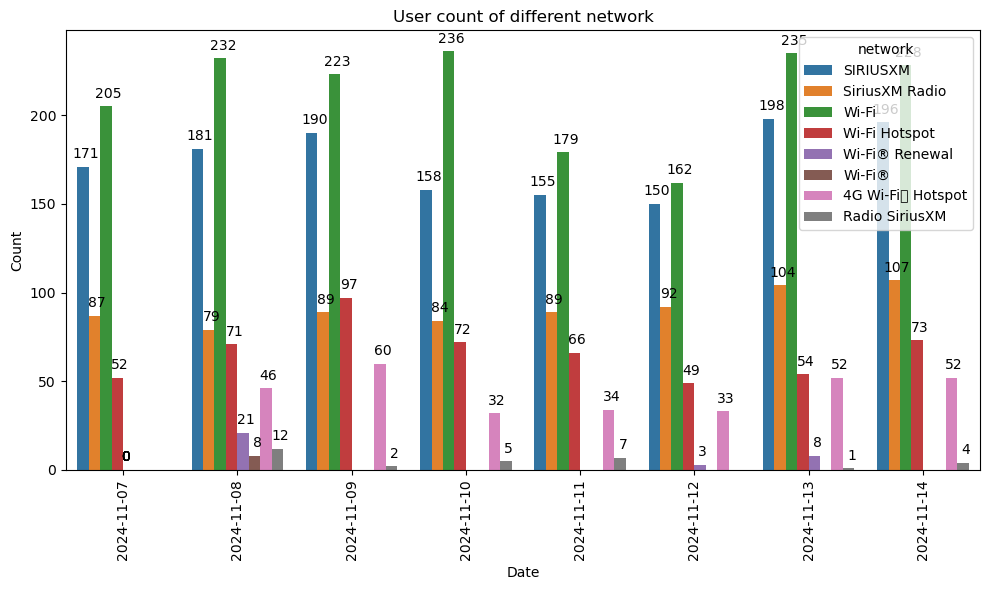

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df3, x='meta', y='count', hue='network')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('User count of different network')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (2, 9), 
                textcoords = 'offset points')

plt.xticks(rotation=90)
plt.legend(title='network')
plt.tight_layout()
plt.savefig(f'{folder}/network_plot2.png')
plt.show()

In [18]:
import pandas as pd
pd.__version__

'2.1.4'